# Import Data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/NBA/nba_player_stats_2020_2021.csv")

# Data Cleansing

In [3]:
#Some players have joined more than one team during the regular season, 
#fortunately the data aggregate all the stats from the different team in one row for each player 
#So we remove the duplicates and clean nan values
df_clean = df.loc[df.loc[:,'Player'].duplicated() == False]
df_clean.fillna(0.0,inplace=True)
df= df_clean.loc[:, df.columns[1:]]
df

/Users/tom/opt/anaconda3/envs/cloud/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa\achiupr01,PF,21,MIA,61,737,14.2,0.550,0.004,0.482,...,13.5,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4
1,Jaylen Adams\adamsja01,PG,24,MIL,7,18,-6.5,0.125,0.250,0.000,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1
2,Steven Adams\adamsst01,C,27,NOP,58,1605,15.1,0.596,0.010,0.438,...,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7
3,Bam Adebayo\adebaba01,C,23,MIA,64,2143,22.7,0.626,0.010,0.443,...,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7
4,LaMarcus Aldridge\aldrila01,C,35,TOT,26,674,15.7,0.556,0.270,0.159,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,Delon Wright\wrighde01,SG-PG,28,TOT,63,1748,16.3,0.562,0.332,0.243,...,12.6,16.3,2.5,1.8,4.3,0.117,0.6,1.5,2.2,1.8
701,Thaddeus Young\youngth01,PF,32,CHI,68,1652,20.3,0.578,0.068,0.171,...,16.1,22.3,2.8,2.2,5.1,0.147,1.9,1.4,3.3,2.2
702,Trae Young\youngtr01,PG,22,ATL,63,2125,23.0,0.589,0.357,0.491,...,16.2,33.0,5.9,1.3,7.2,0.163,5.3,-1.7,3.7,3.0
703,Cody Zeller\zelleco01,C,28,CHO,48,1005,18.2,0.599,0.086,0.367,...,11.9,18.3,2.1,1.1,3.3,0.156,-0.2,-0.2,-0.5,0.4


# Feature Engineering

Only the columns (features) used for training the model. For now no feature engineering as been performed, and retained columns have been arbitrarily selected. 
Below is the correlation matrix, quantifying how each feature correlate to each other. 

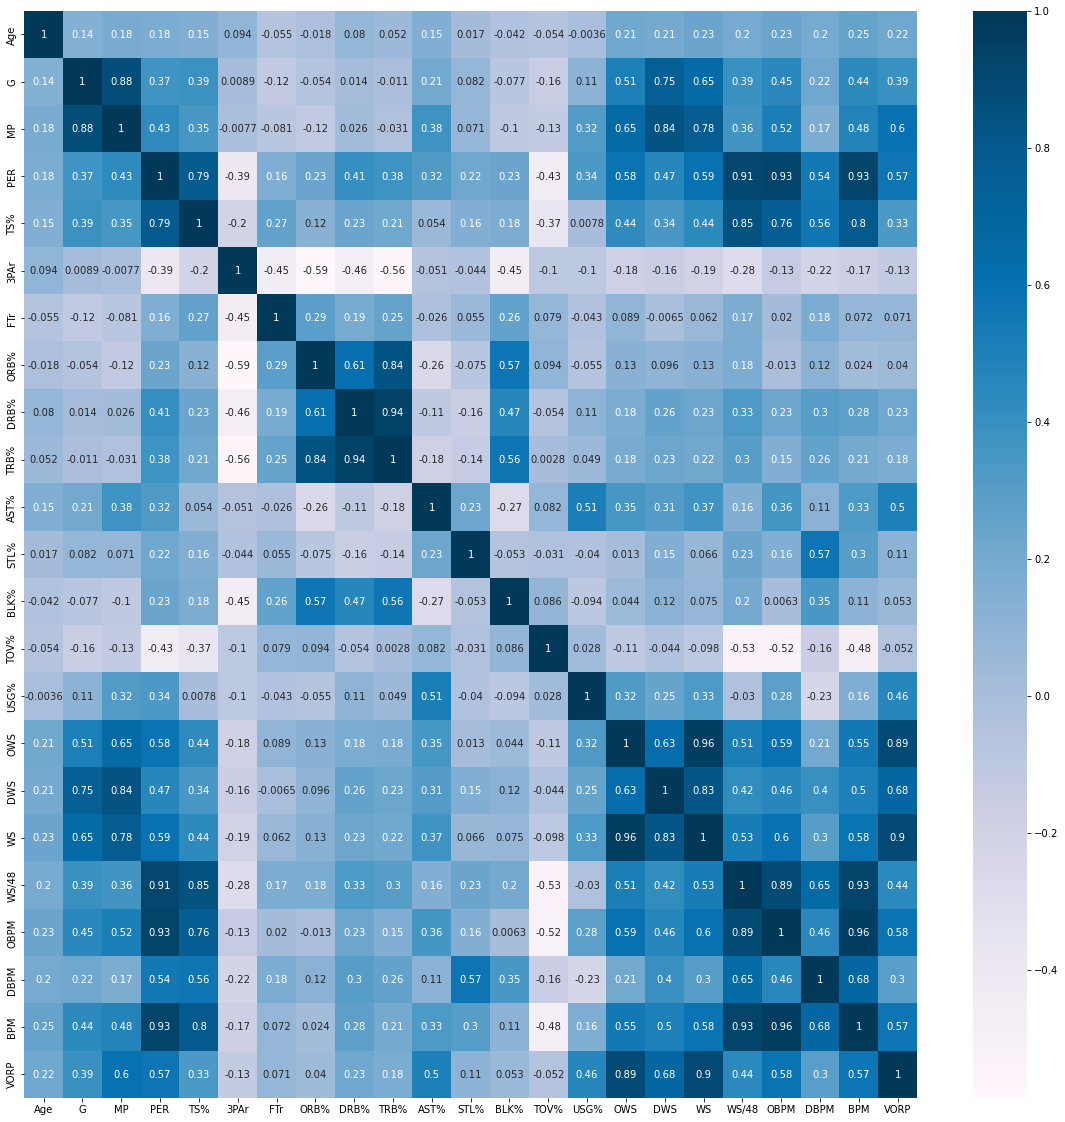

In [4]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate correlation matrix
cor = df.corr() 

# Plot the correlation matrix
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

# Preprocessing

In [5]:

feat_col = ['G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']
df_X = df.loc[:,feat_col]


In [6]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df_X)

Print the standardized matrix, to validate every value are in the range [-1;1]

In [7]:
import numpy as np
X_std

array([[ 0.88495071, -0.32841344,  0.19528814, ..., -0.19793763,
        -0.46286626, -0.80665125],
       [-1.72532268, -1.36073103, -2.8061292 , ..., -2.83313862,
        -3.55325857, -0.53400885],
       [ 0.73993552,  0.91783366,  0.32578455, ...,  0.18770153,
         0.28512678,  0.19303755],
       ...,
       [ 0.9816275 ,  1.66443331,  1.471253  , ..., -0.96921597,
         1.07248788,  2.28329594],
       [ 0.25655156,  0.05637253,  0.77527217, ..., -0.00511805,
         0.24575873, -0.07960485],
       [ 1.41667307,  0.92357673,  0.90576857, ...,  0.38052112,
         0.54101914,  0.64744155]])

# Dimensionality Reduction

"PCA helps us to identify patterns in data based on the correlation between
features. In a nutshell, PCA aims to find the directions of maximum variance in
high-dimensional data and projects it onto a new subspace with equal or fewer
dimensions than the original one. The orthogonal axes (principal components) of the
new subspace can be interpreted as the directions of maximum variance given the
constraint that the new feature axes are orthogonal to each other." -  
(Python Machine Learning, 2nd Edition, Sebastian Raschka & Vahid Mirjalili, 2017)

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_std)
evr = pca.explained_variance_ratio_

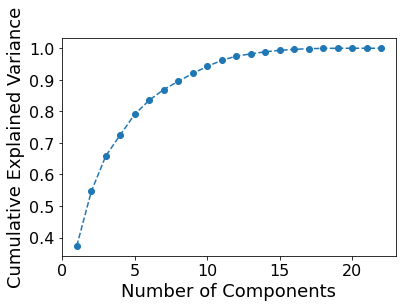

In [9]:
plt.plot(range(1, len(df_X.columns)+1), evr.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In General, we want to keep a number of components for which at least 80% of the explained variance is expressed

In [10]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Number of components:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Number of components: 6


# Model Training

In this project, as a reminder, we want to identify as much clusters as necessary to segregate NBA players among various categories which are described by hidden features among our data. The goal is then to identify and quantify what differentiates players between them thanks to the K-mean clustering algorithm, an unsupervised learning algorithm which outputs clusters of players from players statistics.

The K-means algorithm is about to choose a specific number of centroids, prototype objects representing the average point of similar objects with continuous features, and locate these centroids into the features space. We start with random positions for our centroids, then we identify similarities between objects by computing and minimizing Euclidian distance between objects and the centroids. We attach objects to a specific centroid and then the centroids are moved to the center of objects with the minimum distance to these centroids. These steps are repeated until the distorsion (Sum Squared Error) is minimized.   

The single downside of this technic is the difficulty to determine the right number of centroids for our optimization problem. The thing is the more we have clusters (centroids), the more we minimize the distorsion, however we want also to minimize the number of clusters. So we should compromise between the number of clusters and the level of distorsion. For that, we compute the K-means algorithm for different value of k, and determine the number of k where the distorsion of k starts to considerably drop. This is what we call the elbow method.

## Compute the number of clusters K

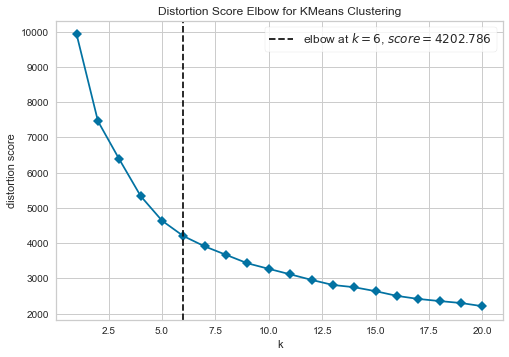

Optimal number of clusters: 6


In [11]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=(1,21), timings=False)
visualizer.fit(scores_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

## Train the model with the optimized number of clusters k

In [13]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=6, random_state=42)

## Add the cluster information to the dataframe

In [14]:
df['Cluster'] = kmeans_pca.labels_
df.loc[df['Cluster']==4]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Cluster
250,Ashton Hagans\haganas01,PG,21,MIN,2,4,-12.4,0.00,0.000,0.0,...,10.5,0.0,0.0,0.0,-0.353,-13.7,-7.4,-21.1,0.0,4
264,Jared Harper\harpeja01,PG,23,NYK,8,16,-10.8,0.26,0.250,1.0,...,24.4,-0.1,0.0,-0.1,-0.365,-16.6,-5.5,-22.1,-0.1,4
406,Will Magnay\magnawi01,C,22,NOP,1,3,-35.1,0.00,1.000,0.0,...,28.0,0.0,0.0,0.0,-0.787,-30.7,-8.6,-39.3,0.0,4
507,Anžejs Pasečņiks\pasecan01,C,25,WAS,1,6,-40.6,0.00,1.000,0.0,...,41.4,-0.1,0.0,-0.1,-1.113,-40.7,-5.9,-46.6,-0.1,4
654,Noah Vonleh\vonleno01,PF,25,BRK,4,11,-19.0,0.00,0.667,0.0,...,19.8,-0.1,0.0,-0.1,-0.488,-20.9,-5.8,-26.7,-0.1,4


# Visualization

In [15]:
from sklearn.preprocessing import MinMaxScaler
def make_normalized_df(df, col_sep):
    non_features = df[df.columns[:col_sep]]
    features = df[df.columns[col_sep:]]
    norm = MinMaxScaler().fit_transform(features)
    scaled = pd.DataFrame(norm, index=df.index, columns = df.columns[col_sep:])
    return pd.concat([non_features, scaled], axis=1)

cluster_labels = df['Cluster']
orig = df.drop(columns=['Cluster'])
values_df = make_normalized_df(orig, 4)
values_df.insert(4, 'cluster', cluster_labels)
values_df.head()

,Player,Pos,Age,Tm,cluster,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa\achiupr01,PF,21,MIA,1,0.845070,0.275526,0.575630,0.510204,0.004,...,0.135,0.429688,0.211921,0.192308,0.182857,0.754408,0.572531,0.482143,0.546976,0.123810
1,Jaylen Adams\adamsja01,PG,24,MIL,2,0.084507,0.005631,0.358193,0.115955,0.250,...,0.000,0.406250,0.185430,0.000000,0.102857,0.542191,0.395062,0.238095,0.344916,0.152381
2,Steven Adams\adamsst01,C,27,NOP,1,0.802817,0.601351,0.585084,0.552876,0.010,...,0.175,0.226562,0.344371,0.326923,0.337143,0.775819,0.621914,0.517857,0.595882,0.228571
3,Bam Adebayo\adebaba01,C,23,MIA,3,0.887324,0.803303,0.664916,0.580705,0.010,...,0.150,0.539062,0.562914,0.615385,0.611429,0.824937,0.672840,0.630952,0.662806,0.514286
4,LaMarcus Aldridge\aldrila01,C,35,TOT,5,0.352113,0.251877,0.591387,0.515770,0.270,...,0.079,0.500000,0.225166,0.115385,0.171429,0.751259,0.625000,0.500000,0.595882,0.190476


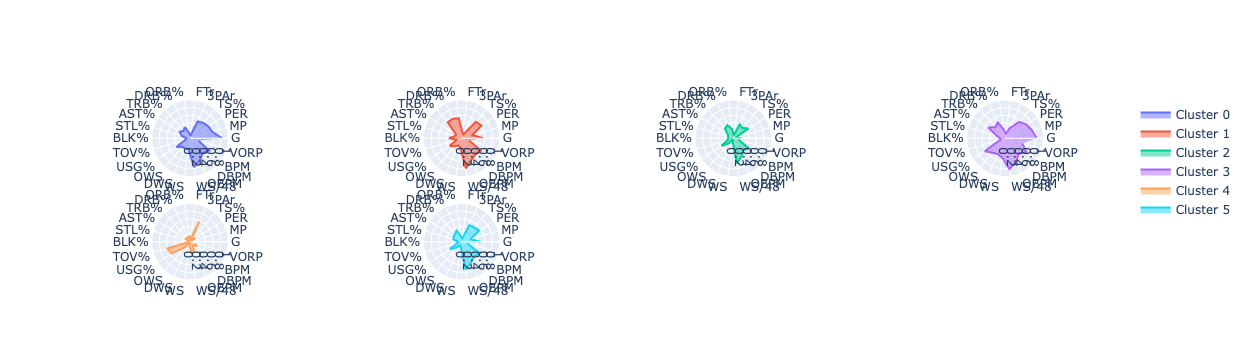

In [20]:
import numpy as np
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=4, specs=[[{'type': 'polar'}]*4]*2)

angles = list(values_df.columns[5:])
angles.append(angles[0])
abbrev = df_X.columns

layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))

for i in range(n_clusters):
    subset = values_df[values_df['cluster'] == i]
    data_ = [np.mean(subset[col]) for col in subset.columns[5:]]
    data_.append(data_[0])
    fig.add_trace(go.Scatterpolar(
        r=data_,
        theta=abbrev,
        fill='toself',
        name="Cluster " + str(i)),
        i // 4 + 1,
        i % 4 + 1)
    
fig.update_layout(
        polar=layoutdict,
        polar2=layoutdict,
        polar3=layoutdict,
        polar4=layoutdict,
        polar5=layoutdict,
        polar6=layoutdict,
        polar7=layoutdict,
        polar8=layoutdict,
        showlegend=True
        )
fig.show()

In [ ]:
list(values_df.loc[values_df['cluster']==2]['Player'])

In [ ]:
tot=0
for i in range(6):
    print('\n###################\n')
    print(f'cluster {i}')
    print('num players : ',len(values_df.loc[values_df['cluster']==i]))
    common_pos = values_df.loc[values_df['cluster']==i]['Pos'].mode().values[0]
    print('num players of most comon pos:', len(values_df.loc[values_df['cluster']==i].loc[values_df['Pos']==common_pos]))
    print(f'Most common position: {common_pos}' )
    tot+=len(values_df.loc[values_df['cluster']==i])
tot

In [ ]:
pd.options.display.max_rows = 999
values_df.loc[values_df['cluster']==0]

In [ ]:
Game Score = Points Scored + (0.4 x Field Goals) – (0.7 x Field Goal Attempts) – (0.4 x (Free Throw Attempts – Free Throws)) + (0.7 x Offensive Rebounds) + (0.3 x Defensive Rebounds) + Steals + (0.7 x Assists) + (0.7 x Blocks) – (0.4 x Personal Fouls) – Turnovers
feat_col = ['G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']
